# Project: New oral insulin to treat diabetes!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:** This dataset has information about 350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.
All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
> - 175 patients switched to Auralin for 24 weeks
> - 175 patients continued using Novodra for 24 weeks

 **patient dataset columns descriptions:**

- **patient_id**: the unique identifier for each patient.
- **assigned_sex**: the assigned gender of each patient (male or female).
- **given_name**: first name of each patient.
- **surname**: last name of each patient.
- **address**: the main address for each patient.
- **city**: city for the main address.
- **state**: state for the main address.
- **zip_code**: zip code for the main address.
- **country**: country for the main address (all United states for this clinical trial).
- **contact**: phone number and email information.
- **birthdate**: the date of birth of each patient (month/day/year). 
- **weight**: the weight in pounds (lbs).
- **height**: the height in inches (in).
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. bmi for this clinical trial is 16 >= BMI >= 38.*



 **treatment dataset columns descriptions:**
- **given_name**: first name of each patient.
- **surname**: last name of each patient.
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash).
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c.  measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

**adverse_reactions dataset columns descriptions:**

- **given_name**: first name of each patient (includes both patients treated Auralin and Novodra).
- **surname**: last name of each patient (includes both patients treated Auralin and Novodra).
- **adverse_reaction**: the adverse reaction reported by the patient.

<h4><center>Note: This data isn't real</center></h1>
 


## **Questions:**


* 1 - Is new oral treatment `Auralin`has more adverse reactions than injectable isnulin `novodra`?
* 2 - Is dose change on `Auralin` acceptable compared to `novodra`?
* 3 - What is the `hba1c change` difference between `Auralin` and `novodra`?
     

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files in to 3 Dataframes  //patients, treatments and adverse reaction//

patients = pd.read_csv("patients.csv")
treatments = pd.read_csv("treatments.csv")
adverse_reactions = pd.read_csv("adverse_reactions.csv")

In [3]:
#checking 5 rows sample from Dataframes

patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
333,334,male,Jad Allah,Gaber,2704 Windy Ridge Road,Monroeville,IN,46773.0,United States,JadAllahSayyarGaber@rhyta.com1 260 623 1176,5/14/1926,174.2,69,25.7
147,148,male,Kristian,Vukelić,4411 Libby Street,West Los Angeles,California,90025.0,United States,310-268-6864KristianVukelic@teleworm.us,11/30/1958,191.4,66,30.9
151,152,female,Satsita,Batukayev,2813 Frederick Street,Citrus Heights,California,95610.0,United States,916-224-7868SatsitaBatukayev@teleworm.us,2/17/1953,219.6,66,35.4
34,35,female,Mariana,Souza,577 Chipmunk Lane,Orrington,ME,4474.0,United States,207-825-8634MarianaGomesSouza@superrito.com,3/6/1948,152.9,63,27.1
384,385,male,Even,Knutsen,4851 Andy Street,Custer,SD,57730.0,United States,EvenKnutsen@rhyta.com+1 (605) 440-5492,10/26/1972,180.2,74,23.1


In [4]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
192,valur,bjarkason,-,31u - 36u,9.71,9.41,0.30
140,jesse,luoma,-,39u - 37u,7.72,7.35,NaN
201,lena,baer,-,41u - 38u,7.70,7.40,0.30
143,nora,nyborg,55u - 59u,-,7.83,7.48,0.35
61,mijndert,ouwendijk,30u - 39u,-,7.81,7.50,0.31


In [5]:
adverse_reactions.sample(5)

,given_name,surname,adverse_reaction
9,sofia,hermansen,injection site discomfort
5,jasmine,sykes,hypoglycemia
10,tegan,johnson,headache
26,clinton,miller,throat irritation
33,krisztina,magyar,hypoglycemia


### Assessing Data

In [6]:
#checking Dataframes basic informations (columns names, number of values, data types ......)

patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [7]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [8]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [9]:
#checking Dataframes shape (number of rows and columns)

patients.shape

(503, 14)

In [10]:
treatments.shape

(280, 7)

In [11]:
adverse_reactions.shape

(34, 3)

In [12]:
#checking more information and descriptive statistics

patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [13]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [14]:
adverse_reactions.describe()

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,berta,johnson,hypoglycemia
freq,1,2,19


In [15]:
# checking for NaN values patients

patients.isnull().sum()

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code        12
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [16]:
treatments.isnull().sum()

given_name        0
surname           0
auralin           0
novodra           0
hba1c_start       0
hba1c_end         0
hba1c_change    109
dtype: int64

In [17]:
adverse_reactions.isnull().sum()

given_name          0
surname             0
adverse_reaction    0
dtype: int64

In [18]:
#checking for duplicated rows 

patients.duplicated().sum()

0

In [19]:
treatments.duplicated().sum()

1

In [20]:
adverse_reactions.duplicated().sum()

0

In [21]:
# checking for duplicated address 

patients[(patients.address.duplicated())&(patients.address.notnull())]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


In [22]:
#checking if duplicated address for same patients

patients.query("address == '648 Old Dear Lane'|address =='2476 Fulton Street'|address =='2778 North Avenue'")

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


In [23]:
treatments[treatments.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [24]:
#checking state values 

patients.state.value_counts()

California    36
TX            32
New York      25
CA            24
NY            22
MA            22
PA            18
GA            15
Illinois      14
OH            14
OK            13
MI            13
Florida       13
LA            13
NJ            12
VA            11
MS            10
WI            10
IL            10
IN             9
MN             9
FL             9
AL             9
TN             9
WA             8
NC             8
KY             8
MO             7
ID             6
NV             6
KS             6
SC             5
IA             5
CT             5
ME             4
RI             4
Nebraska       4
ND             4
CO             4
AZ             4
AR             4
MD             3
DE             3
WV             3
SD             3
OR             3
NE             2
MT             2
VT             2
DC             2
AK             1
WY             1
NH             1
NM             1
Name: state, dtype: int64

In [25]:
# Check the minumum hight Tim Neudorf
# bmi = 703 * weight_lbs / height_in **2

tim_bmi = patients[(patients.given_name == "Tim") & (patients.surname == "Neudorf")].bmi
tim_weight = patients[(patients.given_name == "Tim") & (patients.surname == "Neudorf")].weight
tim_height = np.sqrt(703 * tim_weight/tim_bmi)
tim_height

4    71.969262
dtype: float64

**that means this is a typo error and Tim Neudorf height is 72 not 27**

In [26]:
# Check the minumum Weight - Camilla Zaitseva's Weight
# bmi = 703 * weight_lbs / height_in **2

camilla_bmi = patients[(patients.given_name == "Camilla") & (patients.surname == "Zaitseva")].bmi
camilla_height = patients[(patients.given_name == "Camilla") & (patients.surname == "Zaitseva")].height
camilla_weight = camilla_bmi * (camilla_height**2)/703
camilla_weight

210    107.834851
dtype: float64

In [27]:
# Check Camilla Zaitseva's Weight in KG
# weight_lbs to weight_Kg = weight_lbs * 0.453592

camilla_weight_kg = camilla_weight * 0.453592
camilla_weight_kg

210    48.913026
dtype: float64

**that means Camilla Zaitseva weight inserted in KG instead of lbs**

##  Cleaning Data

### <font color='blue'>Missing Data</font>

1. Treatments dataframe has 280 instead of 350 total record.
2. Treatments dataframe has 109 Missing value -NaN's- on hba1c_change column and hba1c_change calculated wrong.


### <font color='blue'>Tidiness issues</font>

1. Contact column in `patients` dataframe contains two variables phone number and email.
2. Auralin and novodra columns in treatment dataframe should be splited into 3 seperate columns treatment, start_does and end_does.
3. Adverse_reactions is not necessary dataframe we can add it as new column on treatment dataframe.
4. Given_name and surname are duplicated in all dataframes.they are lower case on treatment and adverse_reactions but title format on patients.

### <font color='blue'>Quality issues</font>

1. Zip_code is float not string and zip code has 4 digits instead of 5 sometimes.
2. Birthdate is string not date.
3. State somerimes full name and sometimes abbreviation (California & CA), (Florida & FL), (Illinois & IL), (Nebraska & NE) and (New York & NY).
4. Camilla Zaitseva weight is 48.80 kg instead of lbs.
5. Tim Neudorf hight 27 instead of 72.
6. Contact has multiple phone number formats.
7. There's 5 duplicated rows for John Doe.
8. There's duplicated values for Jakob Jakobsen, Sandra Taylor and Patrick Gersten.
9. Letter u in end of starting and ending dose for auralin and novodra.
10. Auralin and novodra is string not float.
11.  There's no column for does change.
12. There's 1 duplicated row for Joseph Day.

In [28]:
# make copy of origenal dataframes to clean them

patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### <font color='blue'>Missing Data issues</font>

#### 1. treatments dataframe has 280 instead of 350 total record.

##### Solution
* Import treatments Missing records from treatment_cut.csv*.
* Add imported dataframe to treatment dataframe using `append` method.

##### Code

In [29]:
#Import treatments Missing records 

missing_records = pd.read_csv("treatments_cut.csv")
treatments_clean = treatments_clean.append(missing_records)

##### Test

In [30]:
#confirm all records are imported

treatments_clean.shape

(350, 7)

#### 2. treatments dataframe has 109 Missing value -NaN's- on hba1c_change column and hba1c_change calculated wrong.

##### Solution
* Fixing 109 NaNs on hba1c_change column by recalculate it using (hba1c_start - hba1c_end) equation.*

##### Code

In [31]:
# Recalculate hba1c_change

treatments_clean.hba1c_change = treatments_clean.hba1c_start - treatments_clean.hba1c_end

##### Test

In [32]:
# Confirm hba1c_change has no Nans

treatments_clean.hba1c_change.isnull().sum()

0

### <font color='blue'>Tidiness issues</font>

#### 1. Contact column in `patients` dataframe contains two variables phone number and email.

##### Solution
* Extract phone_number and email to two seperat columns by using regular expressions and `str.extract` method.
* Drop contact column.

##### Code

In [33]:
# Extract email and phone number

patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

In [34]:
# Drop contact column

patients_clean = patients_clean.drop('contact', axis=1)

##### Test

In [35]:
# check for phone_number samples 

patients_clean.phone_number.sample(10)

363         562-452-5685
57          858-413-3163
261         617-297-0387
182         201-739-3931
20          781 447 1763
453         281-556-4376
248         308-496-7837
83          937-523-1224
211         612 228 4170
165    +1 (662) 716-9586
Name: phone_number, dtype: object

In [36]:
# Confirm that no emails start with an integer (regex didn't match for this)

patients_clean.email.sort_values().head(10)

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
118         AdibMutazzGhanem@fleckens.hu
420              AdlanShishani@gustr.com
238        AkselHVestergaard@armyspy.com
61                  AlanMilne@dayrep.com
130          AlbertRWolfe@jourrapide.com
Name: email, dtype: object

In [37]:
# Confirm contact column is already dropped

patients_clean.columns

Index(['patient_id', 'assigned_sex', 'given_name', 'surname', 'address',
       'city', 'state', 'zip_code', 'country', 'birthdate', 'weight', 'height',
       'bmi', 'phone_number', 'email'],
      dtype='object')

#### 2. auralin and novodra columns in treatment dataframe should be splited into 3 seperate columns treatment, start_does and end_does.

##### Solution
* Melt auralin and novodra columns into treatment and dose columns using `melt` method. 
* remove "-" from auralin and novodra.
* Split does column to start_dose and end dose columns using `lambda`function and `split` method 
* Drop does column

##### Code

In [38]:
# Melt auralin and novodra columns into treatment

treatments_clean = treatments_clean.melt(id_vars=["given_name","surname","hba1c_start","hba1c_end","hba1c_change"], var_name="treatment", value_name="does")


In [39]:
# remove "-" from auralin and novodra

treatments_clean = treatments_clean[treatments_clean.does != "-"]

In [40]:
# Split does column to start_dose and end dose

treatments_clean["start_does"] = treatments_clean.does.apply(lambda x: x.split("-")[0]) 
treatments_clean["end_does"] = treatments_clean.does.apply(lambda x: x.split("-")[1])

In [41]:
# Drop does column

treatments_clean.drop("does", axis=1, inplace=True)

##### Test

In [42]:
# check head and tail from treatment

treatments_clean.head(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


In [43]:
treatments_clean.tail(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does
688,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u
690,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u
694,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u
698,berta,napolitani,7.68,7.21,0.47,novodra,42u,44u


#### 3. adverse_reactions is not necessary dataframe we can add it as new column on treatment dataframe.

##### Solution
* Merge adverse_reactions with treatment and joining by given_name & surname

##### Code

In [44]:
# Merge adverse_reactions with treatment 

treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean, on=["given_name","surname"], how="left")

##### Test

In [45]:
treatments_clean.adverse_reaction.value_counts()

hypoglycemia                 20
injection site discomfort     6
headache                      3
throat irritation             2
nausea                        2
cough                         2
Name: adverse_reaction, dtype: int64

#### 4. given_name and surname are duplicated in all dataframes.they are lower case on treatment and adverse_reactions but title format on patients.

##### Solution
* Change given_name and surname on patients dataframe into lower case format.
* Join patient_id into treatment dataframe (it's better to use id than name).
* Drop given_name and surname from treatment dataframe.

##### Code

In [46]:
# Change given_name and surname into lower case format

patients_clean["given_name"] = patients_clean["given_name"].str.lower() 
patients_clean["surname"] = patients_clean["surname"].str.lower() 

In [47]:
# Join patient id into treatments 

columns_to_merge = patients_clean[["patient_id", "given_name", "surname"]]
treatments_clean = pd.merge(treatments_clean, columns_to_merge, on = ["given_name","surname"])

In [48]:
# Drop given_name and surname 

treatments_clean.drop(["given_name","surname"], axis=1, inplace = True)

In [49]:
# make patient_id first column 

col = treatments_clean.columns.tolist()
col = col[-1:] + col[:-1]
treatments_clean = treatments_clean[col]

##### Test

In [50]:
# Confirm patient_id already added and given_name and surname already dropped

treatments_clean.sample(5)

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does,adverse_reaction
171,74,7.54,7.15,0.39,auralin,35u,48u,NaN
114,164,7.93,7.56,0.37,auralin,26u,35u,NaN
78,151,7.85,7.50,0.35,auralin,62u,75u,NaN
14,451,7.79,7.40,0.39,auralin,42u,51u,throat irritation
50,371,7.85,7.43,0.42,auralin,39u,52u,NaN


### <font color='blue'>Quality issues</font>

#### 1. zip_code is float not string and zip code has 4 digits instead of 5 sometimes.

##### Solution
* Change zip_code column type to string using `.astype` method.
* Fill '0' before zip_code that has just 4 digits using `.pad` mmethod.
* Fix NaN values.

##### Code

In [51]:
# change zipcode type to string and fill '0' before zip_code that has just 4 digits

patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')

# Fix NaN values.

patients_clean.zip_code = patients_clean.zip_code.replace("0000n",np.nan)

##### Test

In [52]:
# confirm zip_code type and digits less than 5

patients_clean.zip_code.sort_values()

316    01002
38     01581
290    01730
252    01730
167    01730
       ...  
264      NaN
269      NaN
278      NaN
286      NaN
296      NaN
Name: zip_code, Length: 503, dtype: object

#### 2. birthdate is string not date. start_does and end_does is string not float.

##### Solution
* Change birthdate column type to datetime using `.to_datetime` method.

##### Code

In [53]:
# Change birthdate column type

patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

##### Test

In [54]:
# confirm birthdate type already changed

patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    object        
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    object        
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(

#### 3. state somerimes full word and sometimes abbreviation (California & CA), (Florida & FL), (Illinois & IL), (Nebraska & NE) and (New York & NY).

##### Solution
* Replace every full state name with state abbreviation using `mapping` search and `lambda` function 

##### Code

In [55]:
#Replace every full state name with state abbreviation

state_abbrev = {'California': 'CA',
                'Florida': 'FL',
                'Illinois': 'IL',
                'Nebraska': 'NE',
                'New York': 'NY'
                }
patients_clean.state = patients_clean.state.apply(lambda x: state_abbrev[x] if x in state_abbrev.keys() else x)

##### Test

In [56]:
list(patients_clean.state.sort_values())

['AK',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AR',
 'AR',
 'AR',
 'AR',
 'AZ',
 'AZ',
 'AZ',
 'AZ',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CA',
 'CO',
 'CO',
 'CO',
 'CO',
 'CT',
 'CT',
 'CT',
 'CT',
 'CT',
 'DC',
 'DC',
 'DE',
 'DE',
 'DE',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'FL',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'IA',
 'IA',
 'IA',
 'IA',
 'IA',
 'ID',
 'ID',
 'ID',
 'ID',
 'ID',
 'ID',
 'IL',
 'IL',
 'IL',

#### 4. Camilla Zaitseva weight is 48.80 kg instead of lbs.

##### Solution
* Convert weight from kg to lbs using `weight_Kg = weight_lbs * 0.453592` evaluation then replace the wrong value with correct one.

##### Code

In [57]:
# Convert wight to lbs 
# weight_lbs = weight_kg / 0.453592

mask = patients_clean.surname == "zaitseva"
weight_in_kg = patients_clean.weight.min()
weight_in_lbs = round(weight_in_kg/0.453592,2)
patients_clean.loc[mask,"weight"]= weight_in_lbs

##### Test

In [58]:
# Confirm wrong weight already fixed

patients_clean[patients_clean.surname == "zaitseva"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
210,211,female,camilla,zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,1938-11-26,107.59,63,19.1,330-202-2145,CamillaZaitseva@superrito.com


#### 5. Tim Neudorf hight 27 instead of 72.

##### Solution
* Replace wrong height 27 with 72

##### Code

In [59]:
# Replace wrong height

wrong_height = patients_clean.height.min()
mask1 = patients_clean.surname == "neudorf"
patients_clean.loc[mask1,"height"] = 72

##### Test

In [60]:
# Confirm wrong height already fixed

patients_clean[patients_clean.surname == "neudorf"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,tim,neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


#### 6. contact has multiple phone number formats.

##### Solution
* Remove all `"+", "(", "-", ")", " "` symboles using `.replace` method.
* Make all numbers start with 1 because all phone numbers indside US using `.str.pad` method

##### Code

In [61]:
# Remove unwanted symboles and add 1 to begining of all numbers

patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '', regex=True).str.pad(11, fillchar='1')

##### Test

In [62]:
# Confirm changes already done

patients_clean.phone_number.sort_values()

251    11234567890
277    11234567890
244    11234567890
237    11234567890
215    11234567890
          ...     
264            NaN
269            NaN
278            NaN
286            NaN
296            NaN
Name: phone_number, Length: 503, dtype: object

#### 7. there's 5 duplicated rows for John Doe.

##### Solution
* Remove duplicated values for John Doe using `.drop` method

##### Code

In [63]:
# Remove duplicated values for John Doe

duplicated_john = patients_clean[patients_clean.surname=="doe"]
patients_clean.drop(duplicated_john.index[1:], inplace=True)

##### Test

In [64]:
# Confirm all duplicates for john doe already dropped

patients_clean[patients_clean.surname=="doe"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
215,216,male,john,doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com


# _____________________________________________


#### 8. there's duplicated values for Jakob Jakobsen, Sandra Taylor and Patrick Gersten.

##### Solution
* Remove all records with duplicated address without remove records with address value `NaN` 

##### Code

In [65]:
#check duplicated records with same address.

patients_clean[(patients_clean.address.duplicated())&(patients_clean.address.notnull())]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
29,30,male,jake,jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
282,283,female,sandy,taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
502,503,male,pat,gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [66]:
#check differences between duplicate records with same address.

duplicated_records = patients_clean[(patients_clean.address == "648 Old Dear Lane")|(patients_clean.address == "2476 Fulton Street")|(patients_clean.address == "2778 North Avenue")] 
duplicated_records

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,jakob,jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
29,30,male,jake,jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
97,98,male,patrick,gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com
131,132,female,sandra,taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
282,283,female,sandy,taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
502,503,male,pat,gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [67]:
# Drop dupliactes 

patients_clean.drop(duplicated_records.index[[1,4,5]],inplace=True)

##### Test

In [68]:
#confirm all duplicated values already removed 

patients_clean[(patients_clean.address.duplicated())&(patients_clean.address.notnull())]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


#### 9. Letter u in end of starting and ending dose for auralin and novodra. 

##### Solution
* Removing "u" letter from start_dose and end_does using `.split` method and `lambda` function

##### Code

In [69]:
#Removing "u" letter 

treatments_clean["start_does"] = treatments_clean.start_does.apply(lambda x: x.split("u")[0]) 
treatments_clean["end_does"] = treatments_clean.end_does.apply(lambda x: x.split("u")[0])

##### Test

In [70]:
treatments_clean.sample(5)

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does,adverse_reaction
86,209,8.35,7.97,0.38,auralin,22,30,hypoglycemia
211,311,8.00,7.53,0.47,novodra,53,55,NaN
26,102,7.52,7.11,0.41,auralin,54,67,NaN
121,32,7.84,7.41,0.43,auralin,24,36,NaN
42,285,7.86,7.48,0.38,auralin,42,49,NaN


#### 10.  Auralin and novodra is string not float.


##### Solution
* Change  start_does and start_does columns type to float using `.astype` method.

##### Code

In [71]:
# Change start_does and start_does type to float

treatments_clean.start_does = treatments_clean.start_does.astype(float)
treatments_clean.end_does = treatments_clean.end_does.astype(float)

##### Test

In [72]:
treatments_clean.sample(5)

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does,adverse_reaction
267,464,7.72,7.34,0.38,novodra,26.0,30.0,NaN
13,101,9.68,9.29,0.39,auralin,31.0,41.0,NaN
165,39,7.73,7.36,0.37,auralin,25.0,35.0,NaN
311,332,7.72,7.29,0.43,novodra,38.0,32.0,injection site discomfort
315,394,7.87,7.43,0.44,novodra,41.0,43.0,headache


In [73]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        349 non-null    int64  
 1   hba1c_start       349 non-null    float64
 2   hba1c_end         349 non-null    float64
 3   hba1c_change      349 non-null    float64
 4   treatment         349 non-null    object 
 5   start_does        349 non-null    float64
 6   end_does          349 non-null    float64
 7   adverse_reaction  35 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 24.5+ KB


#### 11.  There's no column for does change.


##### Solution
* Make new column "dose_change" = stadt_dose - end_dose 

##### Code

In [74]:
# Change start_does and start_does type to float

treatments_clean["dose_change"] = treatments_clean.start_does -  treatments_clean.end_does

##### Test

In [75]:
treatments_clean.sample(5)

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_does,end_does,adverse_reaction,dose_change
97,341,9.45,8.94,0.51,auralin,38.0,45.0,NaN,-7.0
228,414,7.81,7.42,0.39,novodra,37.0,36.0,NaN,1.0
193,222,7.88,7.48,0.40,novodra,35.0,29.0,NaN,6.0
81,196,7.75,7.40,0.35,auralin,49.0,58.0,NaN,-9.0
136,22,8.00,7.64,0.36,auralin,53.0,56.0,NaN,-3.0


#### 12. there's 1 duplicated row for Joseph Day.

##### Solution
* Remove duplicated values using `.drop_duplicates` method.

##### Code

In [76]:
#Check for number of duplicates 

treatments_clean.duplicated().sum()

1

In [77]:
# Remove duplicated values

treatments_clean.drop_duplicates(inplace=True)

##### Test

In [78]:
# Confirm duplicates already dropped

treatments_clean.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### Research Question 1
> ####  Is new oral treatment `Auralin`has more adverse reactions than injectable isnuline `novodra`?


In [79]:
# adverse_reactions pivot table

treatments_clean.groupby("treatment")["adverse_reaction"].value_counts().unstack("treatment")

treatment,auralin,novodra
adverse_reaction,,
cough,1.0,1.0
headache,1.0,2.0
hypoglycemia,9.0,10.0
injection site discomfort,NaN,6.0
nausea,1.0,1.0
throat irritation,2.0,NaN


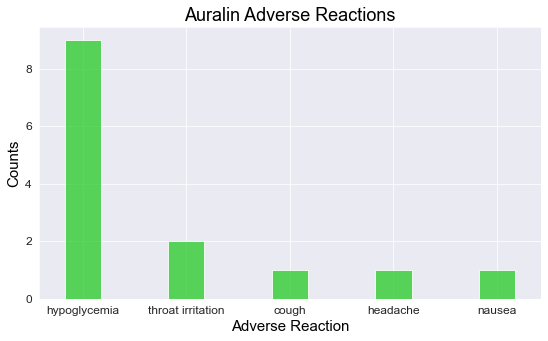

In [80]:
# auralin adverse reactions bar chart

treatments_clean.groupby("treatment")["adverse_reaction"].value_counts()["auralin"].plot(kind="bar",
                                                                                         rot = 0,
                                                                                         width = 0.35,
                                                                                         color=["limegreen"],
                                                                                         alpha = 0.8,
                                                                                         fontsize = 12,
                                                                                         figsize=(9,5)
                                                                                        )


plt.ylabel("Counts",fontsize=15, color="k")
plt.xlabel("Adverse Reaction",fontsize=15, color="k")
plt.title("Auralin Adverse Reactions", fontsize=18, color="k");

Text(0.5, 1.0, 'Novodra Adverse Reactions')

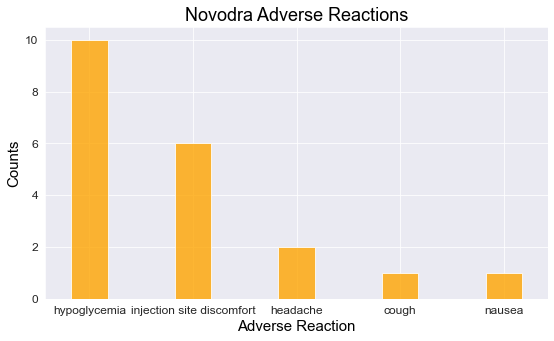

In [81]:
# novodra adverse reactions bar chart

treatments_clean.groupby("treatment")["adverse_reaction"].value_counts()["novodra"].plot(kind="bar",
                                                                                         rot = 0,
                                                                                         width = 0.35,
                                                                                         color=["orange"],
                                                                                         alpha = 0.8,
                                                                                         fontsize = 12,
                                                                                         figsize=(9,5)
                                                                                        )


plt.ylabel("Counts",fontsize=15, color="k")
plt.xlabel("Adverse Reaction",fontsize=15, color="k")
plt.title("Novodra Adverse Reactions", fontsize=18, color="k") 

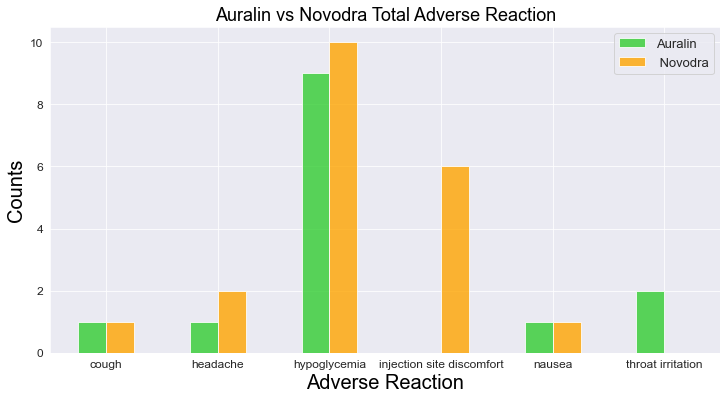

In [82]:
# merging both charts on one chart

treatments_clean.groupby("treatment")["adverse_reaction"].value_counts().unstack("treatment").plot(kind = "bar",
                                                                                               rot = 0,
                                                                                               width = 0.5,
                                                                                               color=["limegreen","orange"],
                                                                                               alpha = 0.8,
                                                                                               fontsize = 12,
                                                                                               figsize=(12,6)
                                                                                              )

plt.ylabel("Counts",fontsize=20, color="k")
plt.xlabel("Adverse Reaction",fontsize=20, color="k")
plt.title("Auralin vs Novodra Total Adverse Reaction", fontsize=18, color="k") 
#labels = ["Auralin","Novodra"]
#plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["Auralin"," Novodra"],fontsize=13);

### Answer 1
* From above visualisation we can conclude the total patients who have adverse reactions for novodra is higher than auralin but there's no obvious difference that we can consider.

   - total patients who have adverse reactions for novodra is 20. 
   - total patients who have adverse reactions for auralin is 14.
   
(That means new oral treatment `aurlin` has been succeeded to pass the adverse reactions phase.)


### Research Question 2
> #### Is dose change on `Auralin` acceptable compared to `novodra`?

In [83]:
# check dose_change means for novodra and auralin

treatments_clean.groupby("treatment")["dose_change"].mean()

treatment
auralin   -8.333333
novodra    0.385057
Name: dose_change, dtype: float64

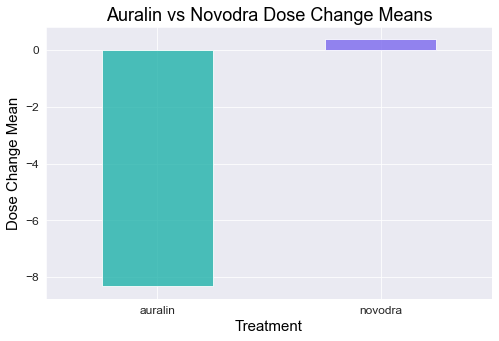

In [84]:
# dose_change means for novodra and auralin bar chart

treatments_clean.groupby("treatment")["dose_change"].mean().plot(kind="bar",
                                                                 rot = 0,
                                                                 width = 0.5,
                                                                 color=["lightseagreen","mediumslateblue"],
                                                                 alpha = 0.8,
                                                                 fontsize = 12,
                                                                 figsize=(8,5)
                                                                )

plt.ylabel("Dose Change Mean",fontsize=15, color="k")
plt.xlabel("Treatment",fontsize=15, color="k")
plt.title("Auralin vs Novodra Dose Change Means", fontsize=18, color="k");

### Answer 2

* From above visualisation we can conclude that patients who are using the new oral treatment needed 8 units of ansulin higher dose from patients who using injectable insulin on average.

   - dose change mean for patients who are using auralin is -8 unit.
   - dose change mean for patients who are using novodra is 0.38 unit.
   

### Research Question 3

> #### What is the `hba1c change` difference between `Auralin` and `novodra`?

In [85]:
# check hba1c_change means for novodra and auralin

treatments_clean.groupby("treatment")["hba1c_change"].mean()

treatment
auralin    0.386954
novodra    0.404713
Name: hba1c_change, dtype: float64

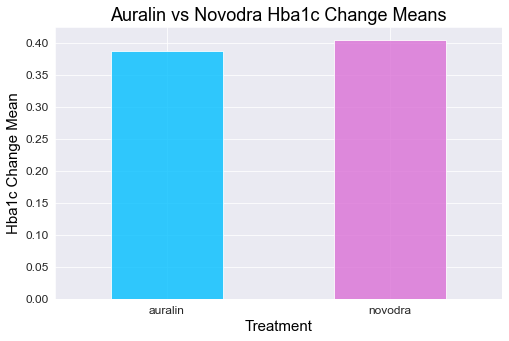

In [86]:
# hba1c_change means for novodra and auralin bar chart

treatments_clean.groupby("treatment")["hba1c_change"].mean().plot(kind="bar",
                                                                 rot = 0,
                                                                 width = 0.5,
                                                                 color=["deepskyblue","orchid"],
                                                                 alpha = 0.8,
                                                                 fontsize = 12,
                                                                 figsize=(8,5)
                                                                )

plt.ylabel("Hba1c Change Mean",fontsize=15, color="k")
plt.xlabel("Treatment",fontsize=15, color="k")
plt.title("Auralin vs Novodra Hba1c Change Means", fontsize=18, color="k");

### Answer 3

* From above visualisation we can conclude that patients who are using the new oral treatment or injectable treatment have approximately the same blood sugar Change on average.

   - Hba1c change mean for patients who are using auralin is 0.39 unit.
   - Hba1c change mean for patients who are using novodra is 0.40 unit.
   
   (Hba1c change mean for auralin is less than 0.4 so that means new oral treatment `aurlin` has been succeeded to pass this phase too.)
   

<a id='conclusions'></a>
## Conclusions

> * Auralin treatment has been succeeded to pass the adverse reactions phase:
     - total patients who have adverse reactions for novodra is 20. 
     - total patients who have adverse reactions for auralin is 14.
       
> * Auralin treatment sugar blood change mean is less than 0.4 so it has a promesing future as new diabetes medicin:
    - Hba1c change mean for patients who are using auralin is 0.39 unit.
    - Hba1c change mean for patients who are using novodra is 0.40 unit.
    
> * Auralin treatment dose is a little higher than injectable treatment but this is an expected result:
    - dose change mean for patients who are using auralin is -8 unit.
    - dose change mean for patients who are using novodra is 0.38 unit.


**(we can conclude that new aurlalin treatment has a promesing future and it has a very good chance to be produced as new diabetes medicin)**